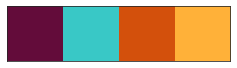

In [66]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

import numpy as np
import os
import pandas as pd
# To make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)


# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [67]:
# Import my spotify data
songs = pd.read_csv("C:/Users/Akschaya balaji/Downloads/Spotify-Machine-Learning-master/data/data_moods.csv")

songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 6 columns):
name            686 non-null object
danceability    686 non-null float64
loudness        686 non-null float64
speechiness     686 non-null float64
acousticness    686 non-null float64
liveness        686 non-null float64
dtypes: float64(5), object(1)
memory usage: 32.3+ KB


In [68]:

#songs = songs.drop(['album','release_date','popularity','length','key','time_signature'],axis=1)
#songs.head()
#songs = songs.drop(['album'],axis=1)
#songs.head()

In [69]:
# to describe numerical features we can use describe()
songs.describe()

,danceability,loudness,speechiness,acousticness,liveness
count,686.000000,686.000000,686.000000,686.000000,686.000000
mean,0.500553,-11.531020,0.053946,0.449749,0.166867
std,0.158955,7.468629,0.041374,0.410729,0.142128
min,0.078900,-42.018000,0.023200,0.000005,0.031800
25%,0.388000,-15.858750,0.033200,0.014825,0.092500
50%,0.505000,-9.358000,0.040700,0.359000,0.111000
75%,0.612000,-5.634500,0.057375,0.905750,0.173750
max,0.941000,1.342000,0.416000,0.996000,0.963000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C123F51708>,
      dtype=object)

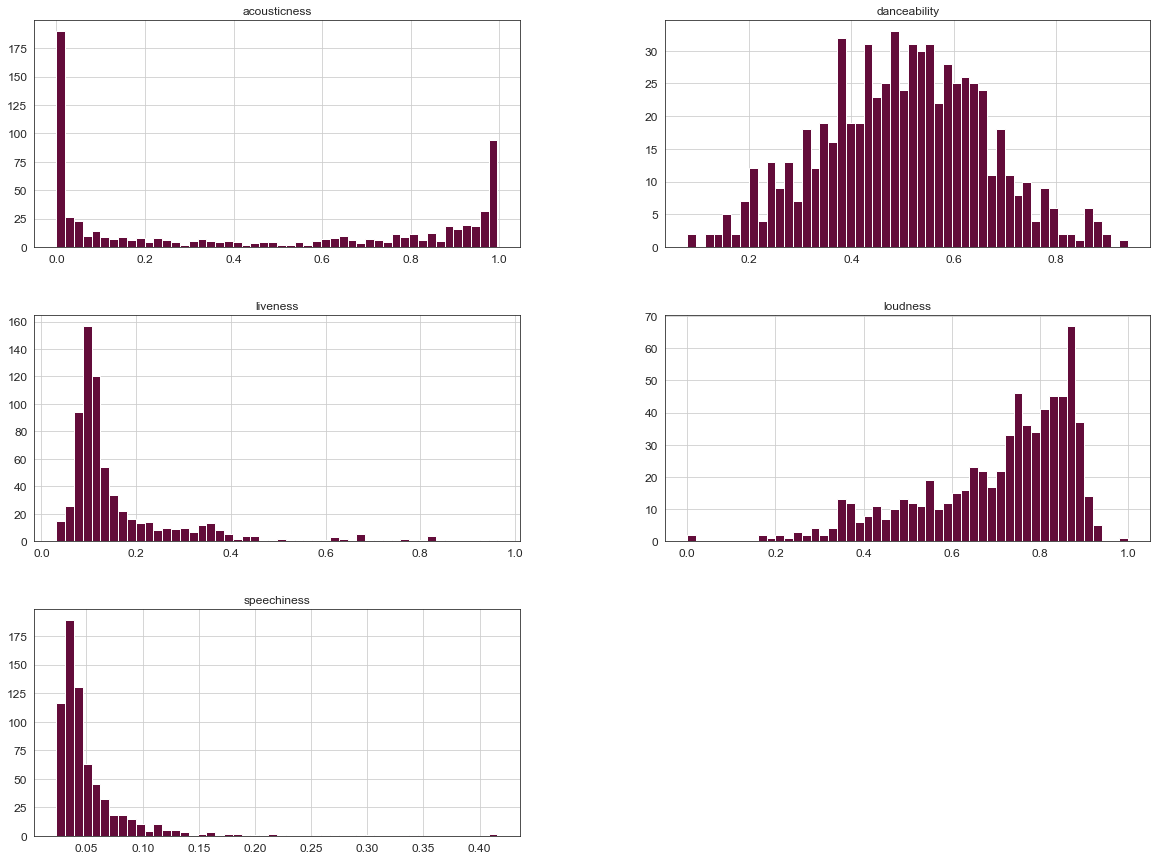

In [70]:
# Loudness feature is from -60db to 0 so we will normalise this column between 0 and 1
# Tempo feature is in BPM so we will scale between 0 and 1 too
from sklearn import preprocessing

loudness = songs[['loudness']].values
min_max_scaler = preprocessing.MinMaxScaler()
loudness_scaled = min_max_scaler.fit_transform(loudness)
songs['loudness'] = pd.DataFrame(loudness_scaled)




songs.hist(bins=50,figsize=(20,15))

Most features are skewed to the left or the right


In [71]:
# from pandas.plotting import scatter_matrix
# # attributes should contain the features we want to compare
# attr = ['danceability','energy','loudness','speechiness','acousticness','tempo','liveness','valence']

# scatter_matrix(songs[attr],figsize=(12,8))

In [72]:
# remove song names, artist and id before clustering
songs_features = songs.copy()
songs_features = songs_features.drop(['name'],axis=1)
songs_features


,danceability,loudness,speechiness,acousticness,liveness
0,0.866,0.779912,0.0767,0.13700,0.0843
1,0.381,0.852145,0.0492,0.01890,0.1530
2,0.346,0.615590,0.0321,0.91300,0.0934
3,0.466,0.672509,0.0608,0.08900,0.1130
4,0.419,0.885932,0.1060,0.00171,0.1370
...,...,...,...,...,...
681,0.402,0.493612,0.0603,0.96100,0.0921
682,0.452,0.799516,0.0255,0.75700,0.1400
683,0.642,0.752583,0.0545,0.78600,0.0906
684,0.561,0.620826,0.0404,0.91300,0.1120


In [73]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(songs_features)
    Sum_of_squared_distances.append(km.inertia_)

In [74]:
from sklearn.metrics import silhouette_score
for n_clusters in range(2,15):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(songs_features)
    centers = clusterer.cluster_centers_

    score = silhouette_score (songs_features, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))


For n_clusters = 2, silhouette score is 0.5902184386488313)
For n_clusters = 3, silhouette score is 0.4416473717518205)
For n_clusters = 4, silhouette score is 0.34857930154407957)
For n_clusters = 5, silhouette score is 0.32981763492960564)
For n_clusters = 6, silhouette score is 0.28341894730974393)
For n_clusters = 7, silhouette score is 0.27625843285215645)
For n_clusters = 8, silhouette score is 0.27986234483392336)
For n_clusters = 9, silhouette score is 0.27895408730162197)
For n_clusters = 10, silhouette score is 0.2712493657124072)
For n_clusters = 11, silhouette score is 0.27735200786097264)
For n_clusters = 12, silhouette score is 0.2689409078506825)
For n_clusters = 13, silhouette score is 0.26574285431585765)
For n_clusters = 14, silhouette score is 0.25399595093194116)


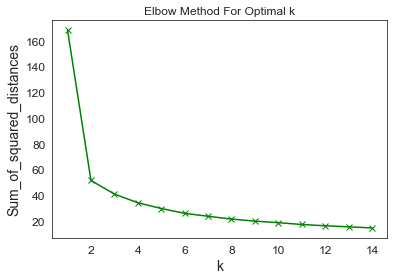

In [75]:
plt.plot(K, Sum_of_squared_distances, 'gx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [76]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(songs_features)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [77]:
# PCA to reduce our data to 2 dimensions for visualisation
from sklearn.decomposition import PCA
y_kmeans = kmeans.predict(songs_features)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(songs_features)


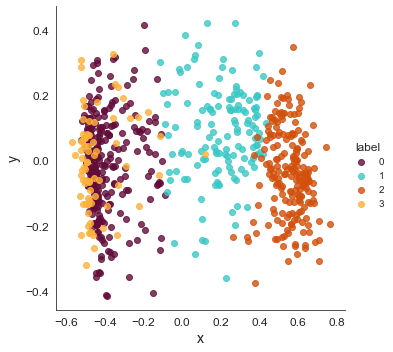

In [78]:
pc = pd.DataFrame(principal_components)
pc['label'] = y_kmeans
pc.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=pc, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)


In [79]:
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
#T-SNE with two dimensions
tsne = TSNE(n_components=2, perplexity=50)

tsne_components = tsne.fit_transform(songs_features)

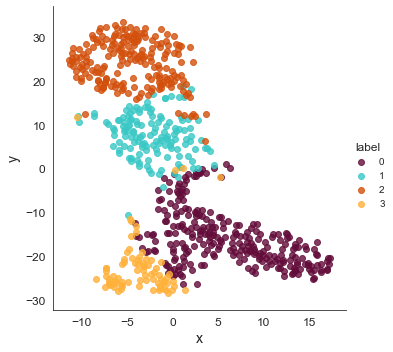

In [80]:
ts = pd.DataFrame(tsne_components)
ts['label'] = y_kmeans
ts.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=ts, x='x', y='y', hue='label', fit_reg=False, legend=True, legend_out=True)

In [81]:
pca.explained_variance_ratio_

array([0.78888994, 0.09103424])

The explained variance tells you how much information (variance) can be attributed to each of the principal components. By looking at the explained_variance_ratio_ we can see the 1st component contains 87% and the 2nd 5% which implies we've retained 92% of the original variance in the data which is awesome! 

In [82]:
# Dump components relations with features:
print (pd.DataFrame(pca.components_,columns=songs_features.columns,index = ['PC-1','PC-2']))


      danceability  loudness  speechiness  acousticness  liveness
PC-1     -0.137234 -0.328867    -0.027752      0.928009 -0.105083
PC-2      0.977968  0.104434     0.001731      0.180380 -0.011506


# Next step lets explore each of the 4 clusters and see what songs they contain

In [83]:
songs['label'] = y_kmeans

# shuffle dataset

songs = songs.sample(frac=1)
songs['label'].value_counts()

0    268
2    202
1    138
3     78
Name: label, dtype: int64

In [84]:
songs[songs['label'] == 0].tail(50)

,name,danceability,loudness,speechiness,acousticness,liveness,label
299,Late in the Evening,0.720,0.761762,0.0406,0.199000,0.0865,0
320,Living,0.460,0.752837,0.0327,0.140000,0.1120,0
433,Promise,0.620,0.874585,0.0327,0.007910,0.0769,0
246,Humans (Let Me Love You),0.584,0.884571,0.0584,0.210000,0.1260,0
325,Lorelei,0.387,0.711047,0.0395,0.000158,0.1660,0
364,My Way - Marcus Santoro Remix,0.563,0.859387,0.0596,0.012200,0.0641,0
451,Rise (ft. Matluck) - Thomas Gold Remix,0.501,0.870065,0.0417,0.007100,0.1550,0
4,A Boy Brushed Red Living In Black And White,0.419,0.885932,0.1060,0.001710,0.1370,0
388,On Another Ocean (January / June),0.284,0.818865,0.0285,0.155000,0.0933,0
369,Never Letting Go,0.534,0.896379,0.0338,0.091500,0.2250,0


In [85]:
songs[songs['label']==0].mean()
 #happy

danceability    0.544638
loudness        0.816416
speechiness     0.060320
acousticness    0.068622
liveness        0.133095
label           0.000000
dtype: float64

In [86]:
songs[songs['label']==1].head(15)

,name,danceability,loudness,speechiness,acousticness,liveness,label
676,no song without you,0.778,0.675484,0.0359,0.463,0.1100,1
528,Surrender,0.390,0.771402,0.0276,0.800,0.1070,1
248,Hypnagogia Well,0.545,0.555005,0.0330,0.771,0.1080,1
379,Nobody,0.877,0.646471,0.1020,0.776,0.1070,1
372,Night Moves,0.705,0.816121,0.0420,0.432,0.1030,1
249,I Can't Help (with Sarcastic Sounds),0.714,0.778459,0.0618,0.393,0.1090,1
347,Minus,0.244,0.670018,0.0296,0.501,0.1050,1
394,Only You,0.545,0.626707,0.0311,0.362,0.0841,1
288,Kids In The Dark,0.470,0.715660,0.0307,0.524,0.0856,1
152,Drifting,0.616,0.642851,0.0383,0.710,0.0871,1


In [22]:
songs[songs['label']==1].mean()
#sad

danceability    0.546031
loudness        0.718128
speechiness     0.044975
acousticness    0.675225
liveness        0.132428
label           1.000000
dtype: float64

In [23]:
songs[songs['label']==2].head(30)

,name,danceability,loudness,speechiness,acousticness,liveness,label
328,Lost,0.3890,0.450969,0.0358,0.972,0.1130,2
670,coeur noir,0.2350,0.480743,0.0712,0.926,0.0690,2
603,Vague,0.3200,0.557542,0.0356,0.881,0.1210,2
11,Adjustments,0.5320,0.693865,0.0283,0.974,0.2280,2
416,Petrichor,0.3190,0.584133,0.0373,0.937,0.1670,2
564,The Snail’s Teachings II: The Wonders of,0.3340,0.340821,0.0416,0.944,0.1050,2
121,Curious Morning,0.3910,0.576983,0.0363,0.969,0.1160,2
607,Video Games - Remastered,0.2360,0.747763,0.0348,0.811,0.0870,2
178,Falling Ashes,0.3320,0.653137,0.0309,0.954,0.0784,2
380,North,0.5220,0.322786,0.0441,0.994,0.0949,2


In [24]:
songs[songs['label']==2].mean()
#calm

danceability    0.391717
loudness        0.489236
speechiness     0.041087
acousticness    0.950035
liveness        0.117399
label           2.000000
dtype: float64

In [25]:
songs[songs['label']==3].head(40)

,name,danceability,loudness,speechiness,acousticness,liveness,label
183,Feeling This,0.411,0.831780,0.0917,0.103000,0.529,3
407,Papercut,0.524,0.876937,0.1130,0.000220,0.623,3
309,Like The First Time - House Mix,0.775,0.748109,0.0383,0.004810,0.661,3
209,Get Up Offa That Thing,0.883,0.729313,0.4110,0.225000,0.941,3
115,Crazy Horses,0.512,0.865152,0.0671,0.215000,0.343,3
8,A Place for My Head,0.603,0.847878,0.1840,0.014400,0.671,3
560,The Mind's Eye,0.376,0.676661,0.0362,0.000708,0.359,3
30,Andromeda,0.463,0.785932,0.0272,0.367000,0.356,3
457,Rusted From the Rain,0.431,0.887569,0.0306,0.000481,0.385,3
242,Hoovela,0.341,0.880766,0.1110,0.001230,0.400,3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C121781B08>,
      dtype=object)

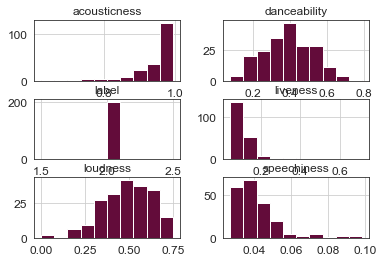

In [26]:
songs[songs['label']==2].hist()

In [27]:
songs[songs['label']==3].mean()
#energetic

danceability    0.550474
loudness        0.841136
speechiness     0.081222
acousticness    0.064733
liveness        0.471949
label           3.000000
dtype: float64

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels

X = songs_features
y = y_kmeans

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

rfc = RandomForestClassifier(n_estimators=100,criterion='gini')
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [88]:
# Predicting the Test set results
y_pred = rfc.predict(X_test)
    

In [89]:


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Confusion matrix, without normalization
[[99  0  0  0]
 [ 0 36  2  0]
 [ 0  2 61  0]
 [ 1  3  0 23]]


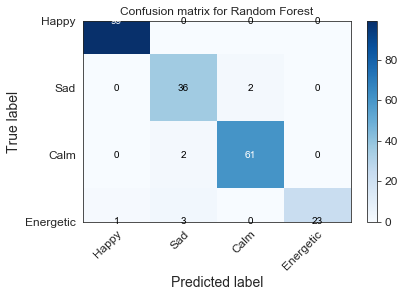

In [90]:
# Confusion matrix
definitions = ['Happy','Sad','Calm','Energetic']
# reversefactor = dict(zip(range(4),definitions))
# actual = np.vectorize(reversefactor.get)(y_test)
# pred = np.vectorize(reversefactor.get)(y_pred)
# print(pd.crosstab(actual, pred, rownames=['Actual Mood'], colnames=['Predicted Mood']))

plot_confusion_matrix(y_test, y_pred, classes=definitions,
                      title='Confusion matrix for Random Forest')

In [91]:
# View a list of the features and their importance scores
features = songs_features.columns
list(zip(songs_features[features], rfc.feature_importances_))

[('danceability', 0.05583743935083185),
 ('loudness', 0.2183508809157587),
 ('speechiness', 0.03434215616022747),
 ('acousticness', 0.5001193038163249),
 ('liveness', 0.19135021975685707)]

In [92]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
# Train the model using the training sets
knn.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [93]:
knn_pred =knn.predict(X_test)

Confusion matrix, without normalization
[[97  0  0  2]
 [ 0 35  2  1]
 [ 0  2 61  0]
 [ 4  2  0 21]]


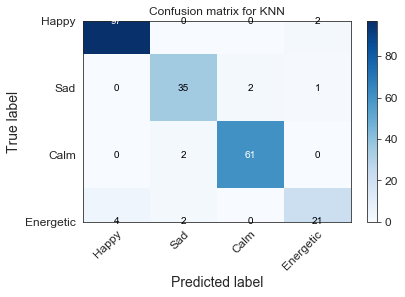

In [94]:
plot_confusion_matrix(y_test, knn_pred, classes=definitions,
                      title='Confusion matrix for KNN')

In [95]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
svm = svm.SVC(kernel="linear") 

#Train the model using the training sets
svm.fit(X_train, y_train)

#Predict the response for test dataset
svm_pred = svm.predict(X_test)

Confusion matrix, without normalization
[[99  0  0  0]
 [ 0 35  3  0]
 [ 0  0 63  0]
 [12  2  0 13]]


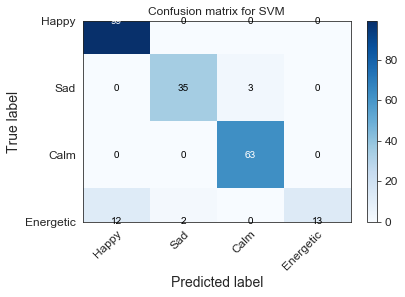

In [96]:
plot_confusion_matrix(y_test, svm_pred, classes=definitions,
                      title='Confusion matrix for SVM')

In [97]:
from sklearn.neural_network import MLPClassifier

In [98]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

C:\Users\Akschaya balaji\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [99]:
mlp_pred = mlp.predict(X_test)

Confusion matrix, without normalization
[[99  0  0  0]
 [ 0 38  0  0]
 [ 0  0 63  0]
 [ 5  2  0 20]]


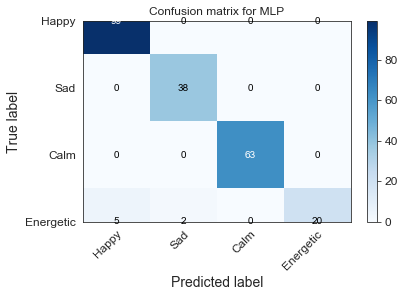

In [100]:
plot_confusion_matrix(y_test, mlp_pred, classes=definitions,
                      title='Confusion matrix for MLP')

In [101]:
print(classification_report(y_test,mlp_pred,target_names=definitions)+'MLP')

              precision    recall  f1-score   support

       Happy       0.95      1.00      0.98        99
         Sad       0.95      1.00      0.97        38
        Calm       1.00      1.00      1.00        63
   Energetic       1.00      0.74      0.85        27

    accuracy                           0.97       227
   macro avg       0.98      0.94      0.95       227
weighted avg       0.97      0.97      0.97       227
MLP


In [102]:
print(classification_report(y_test,svm_pred,target_names=definitions)+'SVM')

              precision    recall  f1-score   support

       Happy       0.89      1.00      0.94        99
         Sad       0.95      0.92      0.93        38
        Calm       0.95      1.00      0.98        63
   Energetic       1.00      0.48      0.65        27

    accuracy                           0.93       227
   macro avg       0.95      0.85      0.88       227
weighted avg       0.93      0.93      0.92       227
SVM


In [103]:
print(classification_report(y_test,knn_pred,target_names=definitions)+'KNN')

              precision    recall  f1-score   support

       Happy       0.96      0.98      0.97        99
         Sad       0.90      0.92      0.91        38
        Calm       0.97      0.97      0.97        63
   Energetic       0.88      0.78      0.82        27

    accuracy                           0.94       227
   macro avg       0.93      0.91      0.92       227
weighted avg       0.94      0.94      0.94       227
KNN


In [104]:
print(classification_report(y_test,y_pred,target_names=definitions)+'forest')

              precision    recall  f1-score   support

       Happy       0.99      1.00      0.99        99
         Sad       0.88      0.95      0.91        38
        Calm       0.97      0.97      0.97        63
   Energetic       1.00      0.85      0.92        27

    accuracy                           0.96       227
   macro avg       0.96      0.94      0.95       227
weighted avg       0.97      0.96      0.96       227
forest
